In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 

In [4]:
konut = pd.read_csv('housing.csv')

>## Veri setimizin ilk 5 verisi.

In [6]:
konut.head() # head() komutu veri kümesinden ilk 5 satırı döndürür, bu şekilde veri kümesini net bir şekilde gözlemleyebiliriz.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
konut.info() #Veri kümesi ile ilgili verinin özellikleri, veri türleri ve sayısı gibi bilgilere erişmek için info() yöntemini kullanıyoruz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


>## Veri Görselleştirme

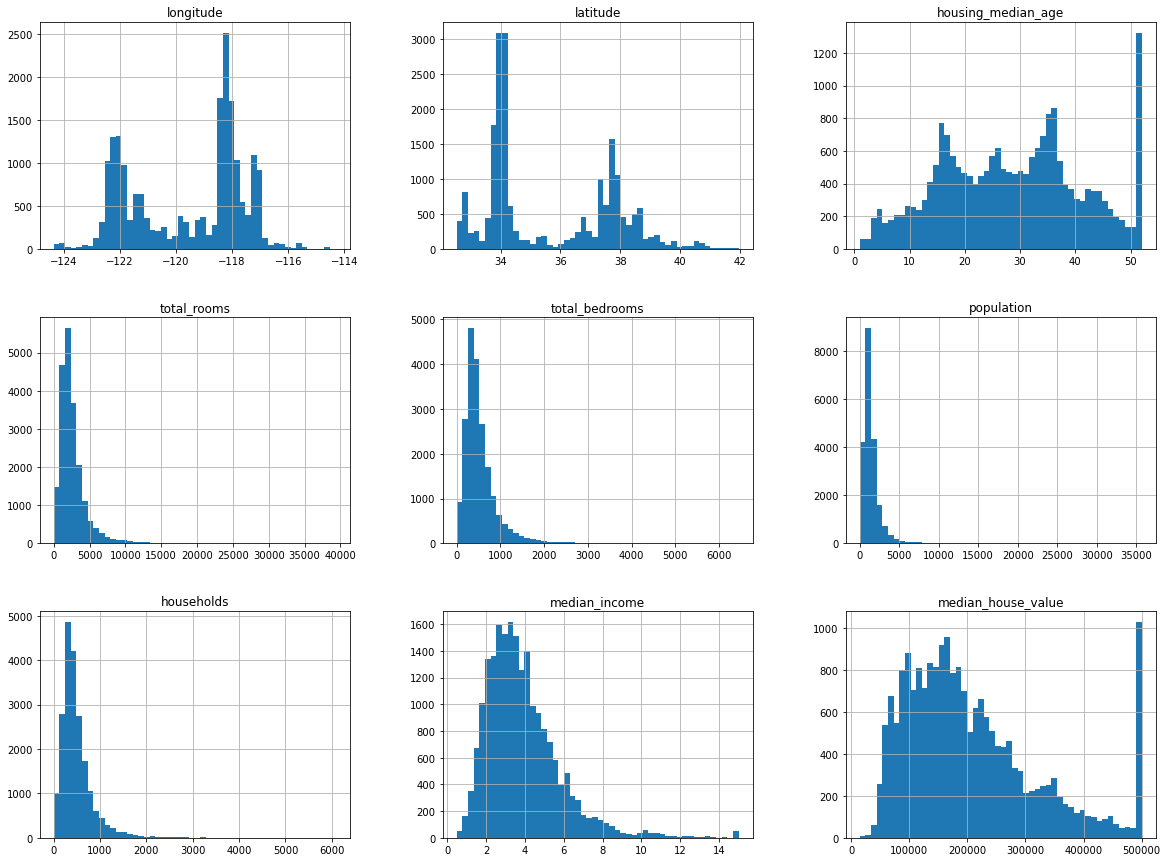

In [11]:
konut.hist(bins=50,figsize=(20,15))
plt.show()

#Verileri görselleştirme için histogramlar olarak çiziyoruz.

In [13]:
konut.isnull().sum() #Veri setimizin boş değerler içerip içermediğini kontrol etmeliyiz.

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

> # Boş değerleri analiz etme

total_bedrooms sütununda bazı boş değerler tespit ettik, bu konuda ne yapabiliriz? Fillna() yöntemini kullanarak temel olarak sayısal değerleri boş değerlerle değiştirebiliriz. Peki ya başka bir yöntem denemek istersek? Bu projede size boş verileri işlemenin alternatif bir yolunu sunmak istiyorum.
Veri kümesinin başını gözlemlediğimizde, total_bedrooms sütunu ile hane sütunu arasında bir miktar korelasyon görüyoruz. İfademizi kanıtlayabilirsek, total_bedrooms sütunundaki eksik değerleri hane sütunundaki karşılık gelen değerlerle değiştirebiliriz. Veri setimizin sadece küçük bir bölümünü gözlemlediğimiz için ifademizden tam olarak emin olamayız.


**İfademizi daha iyi yorumlamak için total_bedrooms sütunlarını ve evler sütunlarını görselleştirelim.**

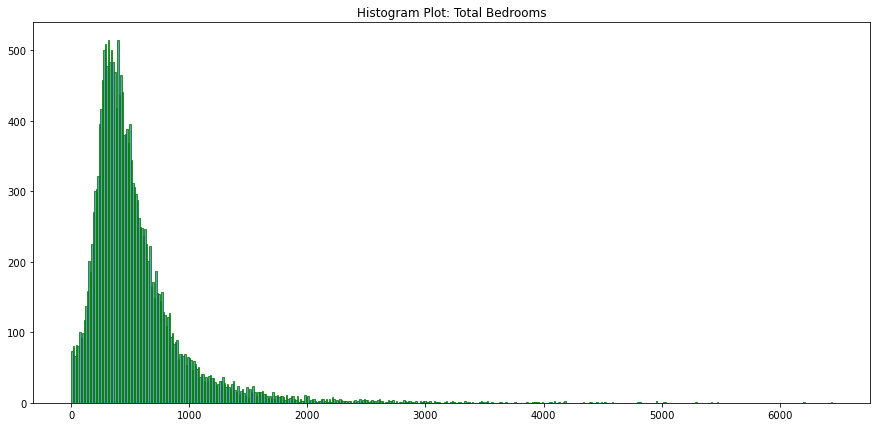

In [14]:
plt.subplots(figsize=(15, 7))

plt.title('Histogram Plot: Total Bedrooms')

total_bedrooms = konut['total_bedrooms']

plt.hist( total_bedrooms, bins=500, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')

plt.show()


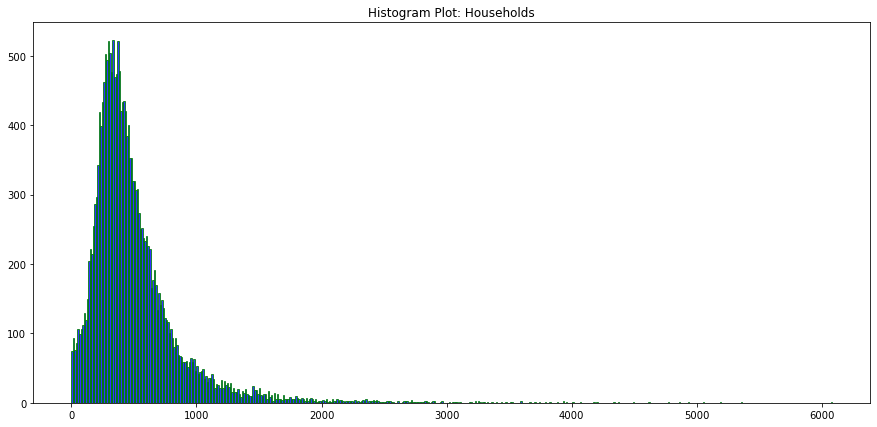

In [15]:
plt.subplots(figsize=(15, 7))

plt.title('Histogram Plot: Households')

households = konut['households']

plt.hist( households, bins=500, alpha=0.8,
          histtype='bar', color='blue',
          edgecolor='green')

plt.show()

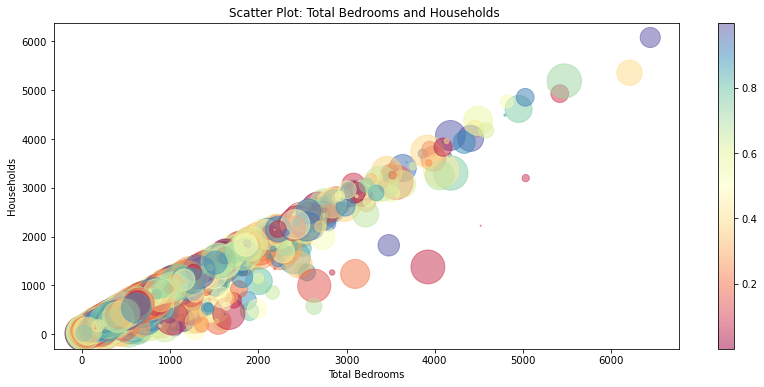

In [16]:
plt.figure(figsize=(14, 6))

plt.rcParams['axes.grid'] = False # Amortisman hatasını bastırmak için

plt.title('Scatter Plot: Total Bedrooms and Households ')


N = households.size
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2 

plt.xlabel('Total Bedrooms')
plt.ylabel('Households')

plt.scatter(total_bedrooms, households, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

> # Toplam yatak odası ve hane halkı arasındaki ilişkiyi gözlemlemek için istatistiklerin uygulanması


Dağılım grafiğinden gözlemlediğimiz gibi, toplam yatak odaları ve haneler arasında pozitif bir eğilim var. Bu nedenle, toplam yatak odalarının ve hanelerin aynı nitelikler olduğuna dair boş bir hipotez varsayıyoruz. Bu durumda, sıfır hipotezimizi reddetmeye çalışmalı ve toplam yatak odası ile hane halkının aynı nitelikler olmadığını varsayan alternatif bir hipotez bulmalıyız.

**Bu ilişkiyi şöyle gösterebiliriz;**

- **tb** : Total bedrooms
- **hh** : House holds
- **Ho** : tb = hh
- **Ha** : tb != hh

> # Sıfır Hipotezini test etmenin adımları nelerdir?

- Bir önem düzeyi belirtin α
- Toplam yatak odaları ve haneler için varyansı hesaplayın
- Toplam yatak odaları ve haneler için standart sapmayı hesaplayın
- t-testi kullanarak p-skorunu değerlendirin
- p-testi uygula, p-skoru anlamlılık düzeyinden büyükse boş hipotezi kabul et, değilse boş hipotezi reddet

**Sıfır hipotezimizi test etmek için anlamlılık seviyemizi 0.05 olarak seçiyoruz.**

In [19]:
# toplam_yatak odası ve hane sayısı farkı
var_total_bedrooms = (np.square(total_bedrooms - total_bedrooms.mean())).sum() / (konut.shape[0] - 1)
var_households = (np.square(households - households.mean())).sum() / (konut.shape[0] - 1)
print(f'Variance of; (total bedrooms: {var_total_bedrooms}, import scipy.stats as stats: {var_households})')

Variance of; (total bedrooms: 175784.4754402569, import scipy.stats as stats: 146176.03990028054)


In [20]:
# Toplam yatak odaları ve haneler için standart sapma
S_total_bedrooms = np.sqrt(var_total_bedrooms)
S_households = np.sqrt(var_households)
print(f'Standart deviation of; (total bedrooms: {S_total_bedrooms}, households: {S_households})')

Standart deviation of; (total bedrooms: 419.26659232552373, households: 382.32975283161073)


In [21]:
# scipy.stats kütüphanesini kullanarak t-testinden p skorunu değerlendirebiliriz
import scipy.stats as stats

tstat, pvalue = stats.ttest_ind_from_stats(total_bedrooms.mean(), S_total_bedrooms, total_bedrooms.size, households.mean(), S_households, households.size)
print(f't score: {tstat}, p score: {pvalue})')

t score: 9.705149779887096, p score: 3.0279724591955457e-22)


Sonuç olarak, p değerimizin anlamlılık düzeyi α'dan (3.0279724591955457e-22 < 0.05) daha düşük olduğunu açıkça görebiliriz.
Bu durumda boş hipotezimizi reddederiz. Yani ifademizin yanlış olduğunu söyleyebiliriz ancak iki sütun arasındaki korelasyonu da kontrol etmeliyiz.

> # İki sütun arasındaki korelasyon.

In [23]:
# total_bedrooms ve haneler arasındaki kovaryans
cov = ((total_bedrooms -  total_bedrooms.mean()) * (households - households.mean())).sum() / (konut.shape[0] - 1)
cov

156246.54825893574

In [24]:
# total_bedrooms ve nüfus arasındaki korelasyon
corr = cov / (S_total_bedrooms * S_households)
corr

0.974724937213194

In [26]:
# Veya daha kısa bir şekilde, sütunlar arasındaki korelasyonu hesaplamak için pandas korelasyon() yöntemini kullanabiliriz.
konut[['total_bedrooms','households']].corr()

,total_bedrooms,households
total_bedrooms,1.000000,0.979728
households,0.979728,1.000000


Dolayısıyla, iki sütun arasında güçlü bir pozitif korelasyon vardır. Sıfır hipotezimizi reddetmemize rağmen, güçlü bir korelasyon olduğu için, toplam yatak odası sütunundaki eksik değerleri hane sütunundaki karşılık gelen değerlerle değiştirebiliriz.

> # Boş değerleri işleme

- Öncelikle total_bedrooms sütunundaki boş değerlerin indekslerini bulmalıyız.
- Ardından hane halkı sütununda karşılık gelen indeksleri alacağız.
- Son olarak boş değerleri hanehalkı sütunundaki değerlerle değiştireceğiz.

In [27]:
# total_bedrooms sütunundaki boş değerlerin dizinlerini bulma ve bunları boş bir listeye ekleme
null_indexes = []
for (i, v) in konut["total_bedrooms"].iteritems():
    if pd.isna(v):
        null_indexes.append(i)
print(null_indexes)


[290, 341, 538, 563, 696, 738, 1097, 1350, 1456, 1493, 1606, 2028, 2115, 2301, 2323, 2334, 2351, 2412, 2420, 2578, 2608, 2647, 2826, 3024, 3328, 3354, 3376, 3482, 3485, 3529, 3721, 3778, 3912, 3921, 3958, 4043, 4046, 4186, 4279, 4309, 4391, 4447, 4496, 4591, 4600, 4629, 4667, 4691, 4738, 4743, 4744, 4767, 4852, 5059, 5216, 5222, 5236, 5654, 5665, 5678, 5723, 5751, 5990, 6052, 6068, 6220, 6241, 6253, 6298, 6421, 6541, 6590, 6814, 6835, 6962, 7097, 7113, 7168, 7191, 7228, 7316, 7330, 7547, 7654, 7668, 7763, 7806, 8337, 8383, 8530, 8915, 9149, 9571, 9620, 9622, 9814, 9845, 9877, 9942, 9970, 10033, 10216, 10236, 10385, 10389, 10428, 10495, 10761, 10885, 10915, 11096, 11311, 11351, 11441, 11449, 11512, 11741, 12101, 12414, 12570, 12809, 13015, 13069, 13311, 13332, 13336, 13597, 13656, 13706, 13925, 13932, 13933, 14015, 14152, 14173, 14307, 14331, 14386, 14462, 14521, 14641, 14930, 14970, 14986, 15030, 15060, 15118, 15137, 15397, 15479, 15607, 15663, 15890, 15975, 16025, 16038, 16104, 16105,

In [28]:
# total_bedrooms sütunundan null_indexes ile ev sütunu değerlerine erişme
values = []

for i in range(len(null_indexes)):
    values.append(konut["households"].iloc[null_indexes[i]])

print(values)


[218.0, 259.0, 1273.0, 146.0, 161.0, 557.0, 600.0, 1012.0, 540.0, 499.0, 626.0, 372.0, 1260.0, 928.0, 580.0, 224.0, 292.0, 243.0, 257.0, 669.0, 266.0, 91.0, 16.0, 584.0, 310.0, 902.0, 769.0, 623.0, 1200.0, 550.0, 737.0, 1492.0, 1280.0, 403.0, 677.0, 155.0, 528.0, 294.0, 312.0, 726.0, 422.0, 439.0, 290.0, 1179.0, 682.0, 1462.0, 439.0, 516.0, 187.0, 271.0, 475.0, 292.0, 245.0, 749.0, 231.0, 476.0, 302.0, 403.0, 771.0, 441.0, 339.0, 326.0, 530.0, 328.0, 727.0, 500.0, 497.0, 403.0, 1251.0, 474.0, 257.0, 155.0, 1012.0, 622.0, 357.0, 552.0, 221.0, 120.0, 452.0, 427.0, 1196.0, 212.0, 248.0, 629.0, 269.0, 130.0, 219.0, 270.0, 951.0, 287.0, 130.0, 1483.0, 132.0, 257.0, 112.0, 428.0, 393.0, 67.0, 72.0, 439.0, 437.0, 276.0, 423.0, 762.0, 541.0, 218.0, 522.0, 183.0, 622.0, 499.0, 351.0, 242.0, 1063.0, 996.0, 606.0, 512.0, 186.0, 1176.0, 202.0, 562.0, 281.0, 627.0, 375.0, 843.0, 611.0, 358.0, 107.0, 391.0, 532.0, 158.0, 375.0, 592.0, 201.0, 539.0, 390.0, 108.0, 499.0, 426.0, 268.0, 687.0, 246.0, 10

In [29]:
# total_bedrooms sütunundaki boş değerler hane sütunundaki değerlerle değiştiriliyor.
index = 0
for (i, v) in konut["total_bedrooms"].iteritems():
    if pd.isna(v):
        konut["total_bedrooms"].iloc[i] = values[index]
        index+=1

In [30]:
# Boş değerlerin hala var olup olmadığını kontrol etme
konut.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

> # Kategorik değerleri analiz etme

Veri setimizde sadece 1 kategorik özelliğimiz var. Daha iyi analiz etmek için önce okyanusa yakınlık sütunumuzu görselleştirelim.

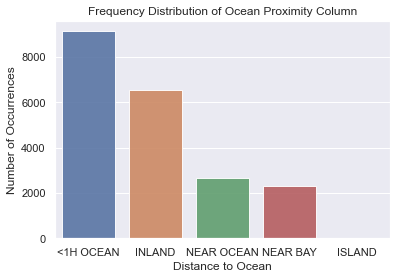

In [31]:
# Ocean_proximity sütununun barplot gösterimi
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

distance_count = konut['ocean_proximity'].value_counts()
sns.set(style="darkgrid")
sns.barplot(distance_count.index, distance_count.values, alpha=0.9)
plt.title('Frequency Distribution of Ocean Proximity Column')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Distance to Ocean', fontsize=12)
plt.show()


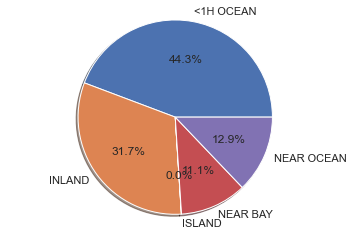

In [32]:
# Ocean_proximity sütununun pasta grafiği gösterimi
labels = konut['ocean_proximity'].astype('category').cat.categories.tolist()
counts =  konut['ocean_proximity'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [33]:
# Ocean_proximity sütunlarındaki her özellik için değer sayısı
print(konut['ocean_proximity'].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


Ocean_proximity sütununda sadece 5 özelliğimiz olduğundan ve bu özelliklerin yorumlanması kolay olduğundan, bunları istenen sayısal değerlerle değiştirebiliriz. Bu durumda onları okyanusa olan uzaklıklarına göre puanlayacağız.
Yerleşimimiz şöyle görünecek;


- INLAND < 1H TO OCEAN < NEAR_BAY < NEAR_OCEAN < ISLAND

> # Kategorik değerleri işleme

Kodladığımız özellikleri ve karşılık gelen değerleri içeren bir sözlük oluşturacağız.

In [34]:
replace_map = {'ocean_proximity': {'<1H OCEAN': 2, 'INLAND': 1, 'NEAR OCEAN': 4, 'NEAR BAY': 3,
                                  'ISLAND': 5}}


In [37]:
konut_replace = konut.copy()
konut_replace.replace(replace_map, inplace=True)
konut_replace.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


> # Aykırı Değerleri Ele Alma

Aykırı değerleri Z-skoru kullanarak tespit ediyoruz, kriterimiz Z-skoru 3. standart sapmanın dışında kalan herhangi bir veri noktasının aykırı olmasıdır.
z-skoru kullanarak aykırı değerleri hesaplama adımları;

- (x-ortalama)/std formülünü kullanarak Z-skorunu hesaplayın.
- 3 eşik değeri tanımlayın ve Z-skoru mutlak değeri eşikten büyük olan veri noktalarını aykırı değer olarak işaretleyin.

Aykırı değerleri bulduğumuzda, onlarla nasıl başa çıkacağımızı düşünürüz. Aykırı değerleri değiştirmek için birkaç teknik vardır, ancak medyan değerlendirme yöntemini kullanacağız. Medyan atamayı kullanmamızın nedeni, medyan yönteminin ortalama yöntem gibi aykırı değerlerin varlığından etkilenmemesidir.

In [38]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# sürücü kodu

In [39]:
sample_outliers = []
# (len - 1) aldık çünkü kategorik değerlerde aykırı değerler aramak istemiyoruz.
for i in range(len(konut_replace.count()) - 1):
    sample_outliers.append(detect_outliers_zscore(konut_replace.iloc[:,i]))

In [40]:
def replace_outliers(data, sample_index):
    median = np.median(data)
    index = 0
    if len(sample_outliers[sample_index]) == 0: # numunede aykırı değer yoksa döner
        return
    for (i, v) in data.iteritems():
        if sample_outliers[sample_index][index] == v:
            data[i] = median
            if index < len(sample_outliers[sample_index]) - 1:
                index +=1

In [41]:
konut_outliers = konut_replace.copy() # Veri çerçevemizi kopyalıyoruz ve aykırı değerleri bu yeni veri çerçevesinde değiştiriyoruz.
for i in range(len(sample_outliers)):
    replace_outliers(konut_outliers.iloc[:,i], i)

- Veri kümesinin ortalamasının aykırı değerlerden etkilendiğini biliyoruz, aykırı değerlerin veri kümemiz üzerindeki etkisini kontrol edelim. Bunun için aykırı değeri olan ve olmayan sütunların ortalamasını alalım.

In [42]:
# Aykırı değerleri olan ve olmayan sütunların ortalaması
df = pd.DataFrame(konut_replace.mean() , columns=['Mean with outliers'])
df['Mean without outliers'] = konut_outliers.mean()

df

,Mean with outliers,Mean without outliers
longitude,-119.569704,-119.569704
latitude,35.631861,35.631861
housing_median_age,28.639486,28.639486
total_rooms,2635.763081,2432.444380
total_bedrooms,537.591279,499.616231
population,1425.476744,1330.515068
households,499.539680,465.958285
median_income,3.870671,3.735332
median_house_value,206855.816909,206855.816909
ocean_proximity,2.051841,2.051841


- Veri setinin medyanının aykırı değerlerden pek etkilenmediğini biliyoruz, hadi aykırı değerlerin veri setimiz üzerindeki etkisini kontrol edelim. Bunun için aykırı değeri olan ve olmayan sütunların medyanını alalım.

In [43]:
# Aykırı değerleri olan ve olmayan sütunların medyanı
df = pd.DataFrame(konut_replace.median() , columns=['Median with outliers'])
df['Median without outliers'] = konut_outliers.median()
df


,Median with outliers,Median without outliers
longitude,-118.4900,-118.49000
latitude,34.2600,34.26000
housing_median_age,29.0000,29.00000
total_rooms,2127.0000,2127.00000
total_bedrooms,435.0000,435.00000
population,1166.0000,1166.00000
households,409.0000,409.00000
median_income,3.5348,3.53475
median_house_value,179700.0000,179700.00000
ocean_proximity,2.0000,2.00000


Çeyrekler arası aralığı (IQR) kullanarak aykırı değerleri de tespit edebiliriz.
IQR uygulama adımları;

- verileri sıralama
- Q1 ve Q3'ü hesaplayın
- IQR'yi Bul (Q3 - Q1)
- Alt sınırı bulun (Q1 - 1,5 * IQR)
- Üst sınırı bulun (Q3 + 1,5 * IQR)

<AxesSubplot:xlabel='median_house_value'>

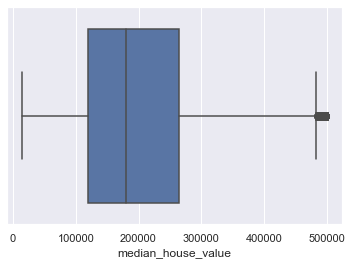

In [44]:
def detect_outliers_iqr(dataset):
    
    outliers = []
    dataset = sorted(dataset)
    q1,q3 = np.percentile(dataset, [25,75])
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    
    for elem in dataset:
        if elem < lower_fence or elem > upper_fence:
            outliers.append(elem)
    return outliers

# Aykırı değerlerin görselleştirilmesi için kutu çizimleri kullanabiliriz
import seaborn as sns

sns.boxplot(konut['median_house_value'])

> # Model Seçimi

Doğru modeli seçmek için kendimize amacımızın ne olduğunu sormalıyız. Sorunun belirlenmesi ve buna göre stratejilerin oluşturulması doğru modelin seçilmesi için çok önemlidir. Problemimizde Kaliforniya'daki ev fiyatlarını tahmin etmemiz isteniyor. Bunun bir Regresyon problemi olduğunu görebiliriz, çünkü görevimiz sürekli bir çıktı değişkenini girdi değişkenlerinden (X) bir eşleştirme fonksiyonuna (f) yaklaştırmaktır.
Tamam, sorunu belirledik, bundan sonra ne yapacağız? Problemi tanımladığımız için, amacımız için farklı algoritmalar arayabiliriz. Bu projede Rastgele Orman Regresyon modelini kullanacağız çünkü araştırmalardan elde edilen sonuçlar, rastgele orman regresyon modelinin şimdiye kadarki en iyi sonuçları verdiğini gösteriyor.

Modelimiz olarak bilim seti rastgele orman regresörünü kullanacağız. Veri setini tren, doğrulama ve test olarak bölmemeyi tercih ettim. Nedeni, doğrulama setini kullanan modelimiz olarak rastgele ormanı kullandığımız için zorunlu değildir. Ayrıca veri kümemiz küçüktür, bu nedenle eğitim kümesindeki hiper parametrenin ince ayarlanması büyük bir sorun olmayacaktır.

bilim seti rastgele orman regresörü uygulama adımları;

- Özniteliklere ve etiket kümelerine bölmek için veri kümesindeki sütunları yeniden düzenleyin.
- Veri kümesini test ve tren olarak ayır
- Veri kümesini ölçeklendirin (Rastgele orman kullandığımız için isteğe bağlıdır)
- Tren modeli
- Modelin tren ve test puanını hesaplayın
- Daha iyi doğruluk elde etmek için hiperparametrelerde ince ayar yapın

In [45]:
# Veri kümesindeki verilerin sırasını yeniden düzenleme
cols = ['longitude', 'latitude', 'housing_median_age','total_rooms', 'total_bedrooms', 
        'population', 'households', 'median_income', 'ocean_proximity', 'median_house_value' ]

dataset = konut_outliers.copy()
dataset = dataset[cols]

dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0


In [46]:
# Veri kümesini niteliklere ve etiket kümelerine bölme
X = dataset.iloc[:, 0:9].values
y = dataset.iloc[:, 9].values

In [47]:
from sklearn.model_selection import train_test_split


# Veri kümesini test ve tren olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [48]:
from sklearn.preprocessing import StandardScaler

# Veri setimizde her sütunun farklı temsil ölçeği vardır, bu bazı algoritmalarda soruna neden olabilir
# Bunu önlemek için veri setimizi ölçeklendiriyoruz

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
import time
from sklearn.ensemble import RandomForestRegressor

time_start = time.time()

# eğitim modeli
regressor = RandomForestRegressor(n_estimators=100, max_features = 0.5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

time_end = time.time() # Modelin çalışma süresini tahmin etme
print(f'Run time : {time_end - time_start}')

Run time : 4.138814210891724


In [50]:
from sklearn import metrics

print('Training score: ', regressor.score(X_train, y_train))
print('Testing score:  ', regressor.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Training score:  0.9746024101641293
Testing score:   0.8229201276638406
Root Mean Squared Error: 48194.81788765576
